# `AA Workshop 6` — Coding Challenge

Complete the tasks below to practice implementing regression modeling from `W6_Regression_Advanced.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- implementing linear regression modelling with polynomial features
- implementing L1 & L2 regularization
- evaluating using proper cross-validation

## Task 1 - Predicting Shared Bike Demand in Seoul

You have been provided with a dataset (`SeoulBikeData.csv` in the `data` directory) that contains counts of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. The dataset is publicly available and you can find further information [here](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand). Your task is to predict the hourly count of shared bikes based on temperature. Do the following:
- Load and inspect the data; perform any clearning steps if necessary.
- Define and create a scatter plot of x and y.
- Perform a train-holdout-test split.
- Train simple, Ridge, and Lasso regression models with polynomial degrees from 1 to 5 and alphas of 0.01, 0.1, 1, 10 (for Ridge and Lasso). Tune hyperparameters based on holdout performance, select the best performing model based on the mean squared error, and calculate final performance on the test set.
- Create a scatter plot of the true values and predictions of the best performing model.

In [2]:
# your code here
import pandas as pd 
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv('../data/SeoulBikeData.csv')



In [3]:
# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

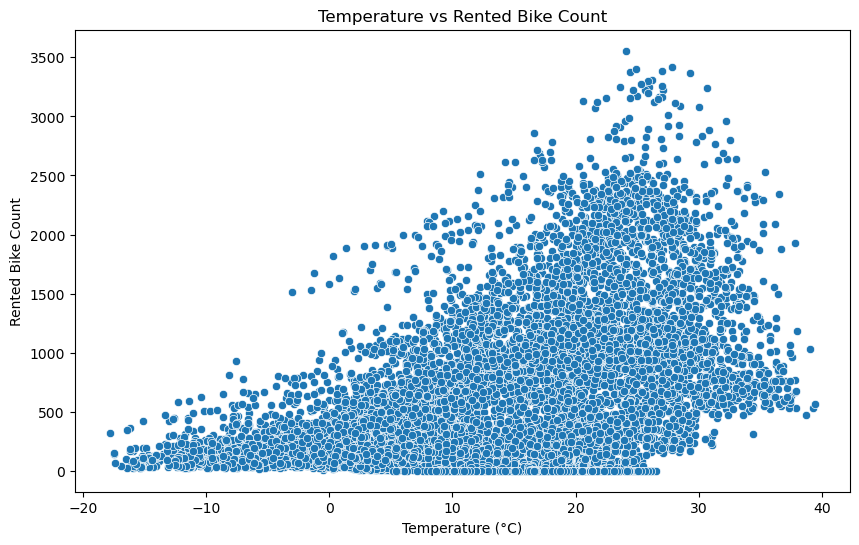

In [4]:
# Scatter plot of Temperature vs Rented Bike Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature(C)', y='Rented Bike Count')
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

---